In [1]:
import numpy as np
import keras
import utils

import matplotlib.pyplot as plt

print("Keras : {}".format(keras.__version__))
%matplotlib inline 

Using TensorFlow backend.


Keras : 2.0.6


## Caisse à outils : même qu'avant

```python
#charger le dataset mnist
utils.load_mnist

#one-hot encoding des labels
keras.utils.np_utils.to_categorical

#créer un modèle avec Keras
keras.models.Sequential

#ajouter des couches dedans 
keras.layers.InputLayer
keras.layers.Dense
keras.layers.Activation

#entrainer le modele par descente du gradient
keras.optimizers.SGD
```


On va utiliser les mêmes outils. 

Mais, on va rajouter des couches cachées entre la couche d'entrée et la sortie. 

(Ces couches seront identiques à tous les modèles)

## Importer et pré-traitement des données

In [3]:
# On effectue les mêmes opérations que précédements
(x_train, y_train), (x_test, y_test) = utils.load_mnist(path="mnist/")

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

# les images sont toujours représentées sour la forme de vecteurs
x_train = x_train.reshape([-1, 28*28])
x_test = x_test.reshape([-1, 28*28])

In [4]:
# idem pour les labels
from keras.utils.np_utils import to_categorical
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

## Construction du réseau de neurones

In [5]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Activation

In [6]:
# on crée un modèle vide
model = Sequential()

#on ajoute une première couche qui spécifie la taille des données (couche d'entrée)
model.add(InputLayer(input_shape=(784,)))

# on ajoute des couches cachées (directement avec la fonction d'activation)
model.add(Dense(256, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))

# puis couche de sortie + fonction d'activation 'softmax'
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summarymary()

## Apprentissage du réseau de neurones

In [14]:
# pour l'instant on garde l'algo 'SGD'
# mais on ajoute du `momentum` (cf slides)

from keras.optimizers import SGD
sgd = SGD(lr=0.0005, momentum=0.9)

In [15]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train_enc,
              batch_size=32, epochs=200,
              verbose=2,
              validation_split=0.2,
              shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
4s - loss: 0.1753 - acc: 0.9494 - val_loss: 0.1800 - val_acc: 0.9494
Epoch 2/200
5s - loss: 0.1741 - acc: 0.9497 - val_loss: 0.1783 - val_acc: 0.9493
Epoch 3/200
5s - loss: 0.1730 - acc: 0.9499 - val_loss: 0.1775 - val_acc: 0.9496
Epoch 4/200
5s - loss: 0.1718 - acc: 0.9502 - val_loss: 0.1756 - val_acc: 0.9498
Epoch 5/200
5s - loss: 0.1706 - acc: 0.9507 - val_loss: 0.1751 - val_acc: 0.9502
Epoch 6/200
4s - loss: 0.1694 - acc: 0.9513 - val_loss: 0.1747 - val_acc: 0.9506
Epoch 7/200
4s - loss: 0.1682 - acc: 0.9519 - val_loss: 0.1733 - val_acc: 0.9505
Epoch 8/200
4s - loss: 0.1672 - acc: 0.9521 - val_loss: 0.1725 - val_acc: 0.9504
Epoch 9/200
4s - loss: 0.1660 - acc: 0.9522 - val_loss: 0.1712 - val_acc: 0.9510
Epoch 10/200
4s - loss: 0.1649 - acc: 0.9530 - val_loss: 0.1709 - val_acc: 0.9510
Epoch 11/200
4s - loss: 0.1638 - acc: 0.9532 - val_loss: 0.1695 - val_acc: 0.9507
Epoch 12/200
4s - loss: 0.1627 - acc: 0.9535 - val_loss: 

4s - loss: 0.0963 - acc: 0.9741 - val_loss: 0.1204 - val_acc: 0.9643
Epoch 102/200
4s - loss: 0.0957 - acc: 0.9741 - val_loss: 0.1201 - val_acc: 0.9652
Epoch 103/200
4s - loss: 0.0952 - acc: 0.9745 - val_loss: 0.1210 - val_acc: 0.9647
Epoch 104/200
5s - loss: 0.0947 - acc: 0.9742 - val_loss: 0.1201 - val_acc: 0.9656
Epoch 105/200
5s - loss: 0.0943 - acc: 0.9747 - val_loss: 0.1193 - val_acc: 0.9658
Epoch 106/200
6s - loss: 0.0938 - acc: 0.9745 - val_loss: 0.1193 - val_acc: 0.9639
Epoch 107/200
6s - loss: 0.0934 - acc: 0.9745 - val_loss: 0.1186 - val_acc: 0.9658
Epoch 108/200
5s - loss: 0.0928 - acc: 0.9746 - val_loss: 0.1186 - val_acc: 0.9659
Epoch 109/200
5s - loss: 0.0924 - acc: 0.9751 - val_loss: 0.1181 - val_acc: 0.9657
Epoch 110/200
5s - loss: 0.0918 - acc: 0.9751 - val_loss: 0.1182 - val_acc: 0.9654
Epoch 111/200
4s - loss: 0.0913 - acc: 0.9753 - val_loss: 0.1178 - val_acc: 0.9657
Epoch 112/200
5s - loss: 0.0910 - acc: 0.9754 - val_loss: 0.1175 - val_acc: 0.9654
Epoch 113/200
4s -

4s - loss: 0.0595 - acc: 0.9851 - val_loss: 0.1023 - val_acc: 0.9711


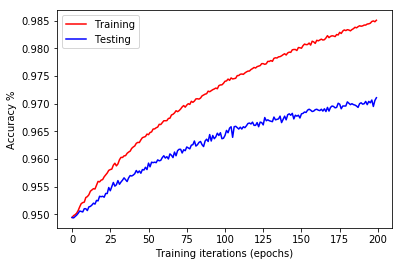

In [20]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.ylabel('Accuracy %')
plt.xlabel('Training iterations (epochs)')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

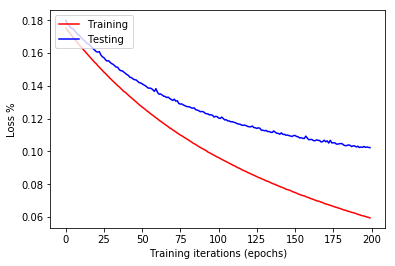

In [21]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.ylabel('Loss %')
plt.xlabel('Training iterations (epochs)')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

## Evaluer son modèle

In [12]:
res = model.evaluate(x_test, y_test_enc)
print("\n[loss, accuracy] : {}".format(res))

 8992/10000 [=========================>....] - ETA: 0s
[loss, accuracy] : [0.25024286168217658, 0.92700000000000005]


In [13]:
model.save("models/model_deep_NN.h5")